<a href="https://colab.research.google.com/github/wongwara/AT2_Classification/blob/main/MLAA_Lab_5_Exercise_3_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Multi-Class Classification**


## Exercise 3: Multi-class Classification with SVC and Decision Tree

In this exercice you will build 2 multiclass classification models using SVM and Decision Tree and compared their a

For this exercice we will once again build a multiclass classifier using a SVM and a Decision Tree.

For that we will use the famous Zoo dataset which we can find on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Zoo

You will have to import the prepared dataset from the following link:
https://raw.githubusercontent.com/aso-uts/mlaa/main/datasets/lab5/ex3/zoo.csv

The steps are:

1.   Import and explore the dataset
2.   Prepare data
3.   Split data
4.   Scale the data
5.   Assess baseline model
6.   Train SVC with Default Hyperparameters
7.   Reduce Overfitting on SVC
8.   Train a Decision Tree with Default Hyperparameters
9.   Reduce Decision Tree Overfitting
10.  Assess model on Testing Set



## 1. Load and Explore Dataset

**[1.2]** Import the pandas and numpy packages

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import pandas as pd
import numpy as np

**[1.3]** Load the dataset into a dataframe called df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/mlaa/main/datasets/lab5/ex3/zoo.csv'
df = pd.read_csv(file_url)

**[1.4]** Display the first 5 rows of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


**[1.5]** Display the dimensions (shape) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.shape

(101, 18)

**[1.6]** Display the summary (info) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


**[1.7]** Display the descriptive statictics of df


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


**[1.8]** Create a for loop that will iterate through each columns and print their list of unique values

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
for col in df.columns:
  print(col)
  print(df[col].unique())

animal_name
['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
hair
[1 0]
feathers
[0 1]
eggs
[0 1]
milk
[1 0]
airborne
[0 1]
aquatic
[0 1]
predator
[

Most of the columns are binary. The feature 'legs' is numerical. Two of them are categorical: animal_name and type. 'type' is our target variable, we will transform it into categorical. The 'animal_type' feature is correlated to 'type' so we will drop it.

## 2. Data Preparation

**[2.1]** Create a copy of df and save it into a variable called df_cleaned

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned = df.copy()

**[2.2]** Drop the 'animal_type' and 'type' columns and save it into a variable called X

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X = df_cleaned.drop(['animal_name','type'], axis=1)

**[2.3]** Extract the 'type' column into a variable called y

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y = df_cleaned['type']

**[2.4]** Convert the target variable into categorical

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y = y.astype('category')

## 3. Splitting Data

**[3.1]** Print the frequencies of each value of the target variable

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y.value_counts(normalize=True)

1    0.405941
2    0.198020
4    0.128713
7    0.099010
6    0.079208
3    0.049505
5    0.039604
Name: type, dtype: float64

**[3.2]** Import train_test_split from sklearn.model_selection

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.model_selection import train_test_split

**[3.3]** Split randomly the dataset into 2 different sets: data (80%) and test (20%) with random_state=8

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

**[3.4]** Print the frequencies of each value of the target variable from the testing set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_test.value_counts(normalize=True)

1    0.380952
2    0.285714
3    0.142857
6    0.095238
4    0.047619
7    0.047619
5    0.000000
Name: type, dtype: float64

We can see that class 5 is missing from this split

**[3.5]** Split randomly the dataset into 2 different sets: data (80%) and test (20%) with random_state=8 and stratify=y and print the frequencies of each value of the target variable from the testing set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)
y_test.value_counts(normalize=True)

1    0.380952
2    0.190476
4    0.142857
6    0.095238
7    0.095238
3    0.047619
5    0.047619
Name: type, dtype: float64

**[3.5]** Split the data randomly into 2 different sets: training (80%) and validation (20%) with random_state=8 and stratify=y_data and print the frequencies of each value of the target variable from the validation set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8, stratify=y_data)
y_val.value_counts(normalize=True)

1    0.4375
2    0.1875
4    0.1250
3    0.0625
5    0.0625
6    0.0625
7    0.0625
Name: type, dtype: float64

**[3.6]** Print the frequencies of each value of the target variable from the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_train.value_counts(normalize=True)

1    0.406250
2    0.203125
4    0.125000
7    0.109375
6    0.078125
3    0.046875
5    0.031250
Name: type, dtype: float64

## 4. Scale the data

**[4.1]** Import MinMaxScaler from Sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
from sklearn.preprocessing import MinMaxScaler

**[4.2]** Instantiate a MinMaxScaler and save it into a variable called `scaler`

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
scaler = MinMaxScaler()

**[4.3]** Fit the scaler on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
scaler.fit(X_train)

MinMaxScaler()

**[4.4]** Apply the scaler on all sets and save the results into separate variables (X_train_scaled, X_val_scaled, X_test_scaled)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## 5. Assess Baseline Model


**[5.1]** Find the mode of the target variable from the training set and print its value

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_mode = y_train.mode()
y_mode

0    1
Name: type, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

**[5.2]** Create a numpy array with the same dimensions as for the training set called y_base filled with this value



In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_base = np.full(y_train.shape, y_mode)

**[5.3]** Import the accuracy and f1 scores from sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.metrics import accuracy_score, f1_score

**[5.4]** Display the accuracy and f1 scores of this baseline model on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))

0.40625
0.2347222222222222


## 6. Train SVC with Default Hyperparameters

**[6.1]** Import SVC from sklearn.svm

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.svm import SVC

**[6.2]** Instantiate a SVC() model with default hyperparameters

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_1 = SVC()

**[6.3]** Train the model on the training set and save the predictions from the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_1.fit(X_train_scaled, y_train)
y_train_preds = svc_1.predict(X_train)
y_val_preds = svc_1.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


**[6.4]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.828125
0.75


**[6.5]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7804879148629149
0.6527777777777778


**[6.6]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
# Solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[6.7]** Display the confusion matrix on the training and validation sets

In [ ]:
# Placeholder for student's code

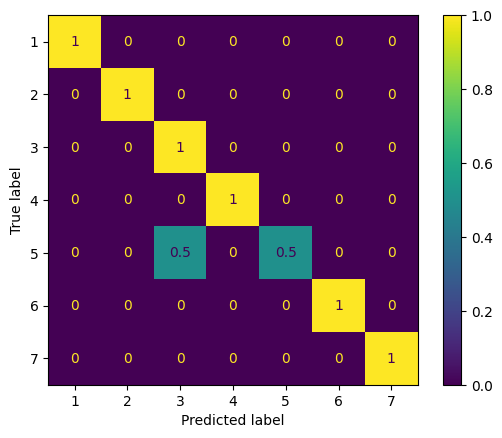

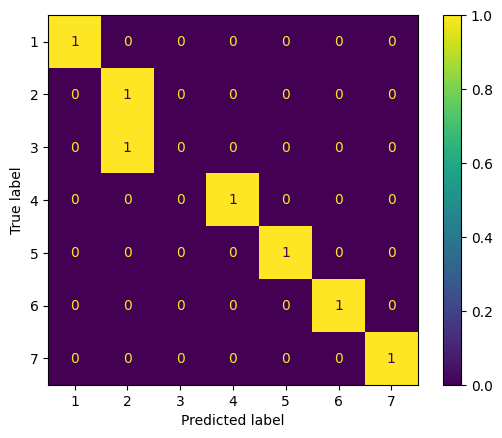

In [ ]:
# Solution
ConfusionMatrixDisplay.from_estimator(svc_1, X_train_scaled, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(svc_1, X_val_scaled, y_val, normalize='true')

## 7. Reduce Overfitting on SVC


### a. Try Different Hyperparamaters Values

**[7.1]** Train a SVC model with C=0.5 and save the predictions from the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_2 = SVC(C=0.5).fit(X_train_scaled, y_train)
y_train_preds = svc_2.predict(X_train)
y_val_preds = svc_2.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


**[7.2]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.8125
0.75


**[7.3]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.761328125
0.6527777777777778


### b. Try Different Hyperparamaters Values

**[7.4]** Train a SVC model with C=1 and save the predictions from the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_3 = SVC(C=1).fit(X_train, y_train)
y_train_preds = svc_3.predict(X_train)
y_val_preds = svc_3.predict(X_val)

**[7.5]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.953125
0.875


**[7.6]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.937037037037037
0.8273809523809523


### c. Try Different Hyperparamaters Values

**[7.7]** Train a SVC model with C=1.5 and save the predictions from the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_4 = SVC(C=1.5).fit(X_train_scaled, y_train)
y_train_preds = svc_4.predict(X_train)
y_val_preds = svc_4.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


**[7.8]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.828125
0.75


**[7.9]** Print the f1 score of the training and validation **sets**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7804879148629149
0.6527777777777778


### d. Try Different Hyperparamaters Values

**[7.10]** Train a SVC model with C=1.5 and gamma=0.1 and save the predictions from the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_5 = SVC(C=1.5, gamma=0.1).fit(X_train_scaled, y_train)
y_train_preds = svc_5.predict(X_train)
y_val_preds = svc_5.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


**[7.11]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.859375
0.75


**[7.12]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.8267099056603774
0.7208333333333333


### e. Try Different Hyperparamaters Values

**[7.13]** Train a SVC model with C=1.5 and gamma=0.2 and save the predictions from the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_6 = SVC(C=1.5, gamma=0.2).fit(X_train_scaled, y_train)
y_train_preds = svc_6.predict(X_train)
y_val_preds = svc_6.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


**[7.14]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.828125
0.75


**[7.15]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7802083333333333
0.6953125


### f. Try Different Hyperparamaters Values

**[7.16]** Train a SVC model with C=1.5 and gamma=0.03 and save the predictions from the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_7 = SVC(C=1.5, gamma=0.03).fit(X_train_scaled, y_train)
y_train_preds = svc_7.predict(X_train)
y_val_preds = svc_7.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


**[7.17]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.84375
0.8125


**[7.18]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7964285714285714
0.7544642857142857


**[7.19]** Display the confusion matrix on the training and validation sets

In [ ]:
# Placeholder for student's code

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


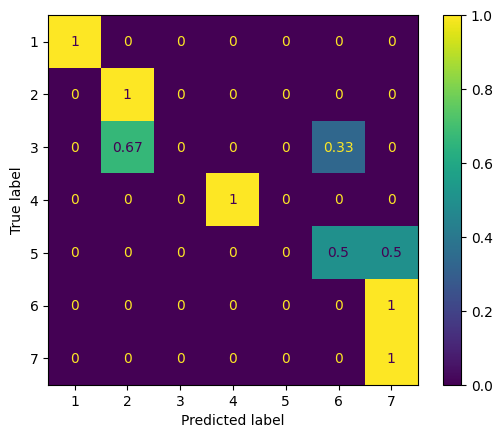

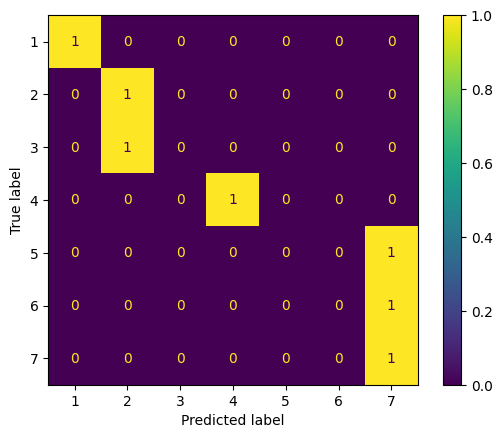

In [ ]:
# Solution
ConfusionMatrixDisplay.from_estimator(svc_7, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(svc_7, X_val, y_val, normalize='true')

## 8. Train a Decision Tree with Default Hyperparameters

**[8.1]** Import DecisionTreeClassifier from sklearn.tree

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.tree import DecisionTreeClassifier

**[8.2]** Instantiate a DecisionTreeClassifier() model with random_state=42 parameter in order to keep our results consistent

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
tree_1 = DecisionTreeClassifier(random_state=42)

**[8.3]** Train the model on the training set and save the predictions from the training and validation sets



In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
tree_1.fit(X_train, y_train)
y_train_preds = tree_1.predict(X_train)
y_val_preds = tree_1.predict(X_val)

**[8.4]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

1.0
0.9375


**[8.5]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

1.0
0.9166666666666666


**[8.6]** Print the confusion matrices for the training and validation sets for this model

In [ ]:
# Placeholder for student's code

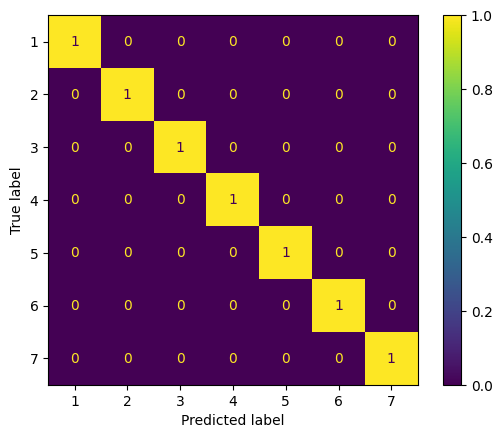

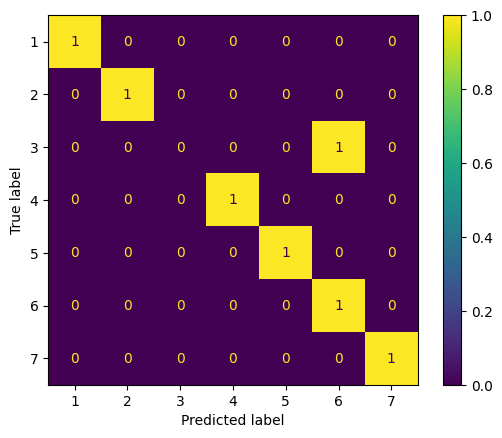

In [ ]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_1, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_1, X_val, y_val, normalize='true')

## 9. Reduce Decision Tree Overfitting

### a. Try Different Hyperparamaters Values

**[9.1]** Train a DecisionTree model with min_samples_split=5 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
tree_3 = DecisionTreeClassifier(random_state=42, min_samples_split=5).fit(X_train, y_train)
y_train_preds = tree_3.predict(X_train)
y_val_preds = tree_3.predict(X_val)

**[9.2]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.984375
0.9375


**[9.3]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9844842657342657
0.9166666666666666


### b. Try Different Hyperparamaters Values

**[9.4]** Train a DecisionTree model with min_samples_split=20 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
tree_4 = DecisionTreeClassifier(random_state=42, min_samples_split=20).fit(X_train, y_train)
y_train_preds = tree_4.predict(X_train)
y_val_preds = tree_4.predict(X_val)

**[9.5]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.84375
0.8125


**[9.6]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7981770833333334
0.775


**[9.7]** Print the current value of max_depth

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
tree_4.tree_.max_depth

3

### c. Try Different Hyperparamaters Values

**[9.8]** Train a DecisionTree model with min_samples_split=5, max_depth=3 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
tree_5 = DecisionTreeClassifier(random_state=42, min_samples_split=5, max_depth=3).fit(X_train, y_train)
y_train_preds = tree_5.predict(X_train)
y_val_preds = tree_5.predict(X_val)

**[9.9]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.84375
0.8125


**[9.10]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7981770833333334
0.775


### d. Try Different Hyperparamaters Values

**[9.11]** Train a DecisionTree model with min_samples_split=20, max_depth=4 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
tree_6 = DecisionTreeClassifier(random_state=42, min_samples_split=5, max_depth=4).fit(X_train, y_train)
y_train_preds = tree_6.predict(X_train)
y_val_preds = tree_6.predict(X_val)

**[9.12]** Print the accuracy score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.90625
0.875


**[9.13]** Print the f1 score of the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.8803819444444444
0.84375


## 10. Assess model on Testing Set

**[10.1]** Print the accuracy and f1 scores of our best model on the testing set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_test_preds = tree_3.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))

0.9047619047619048
0.8857142857142856


**[10.2]** Display the confusion matrix for our best model on all sets

In [ ]:
# Placeholder for student's code

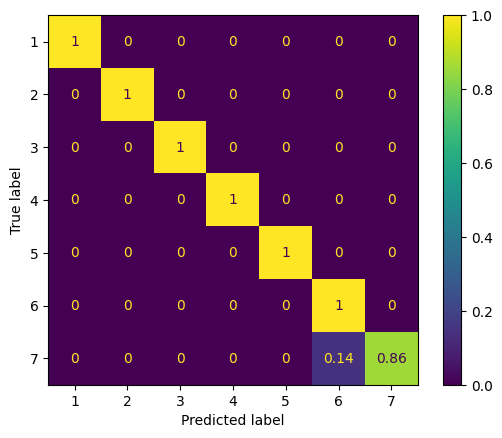

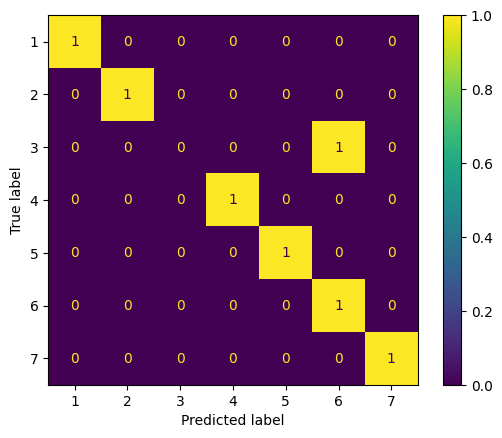

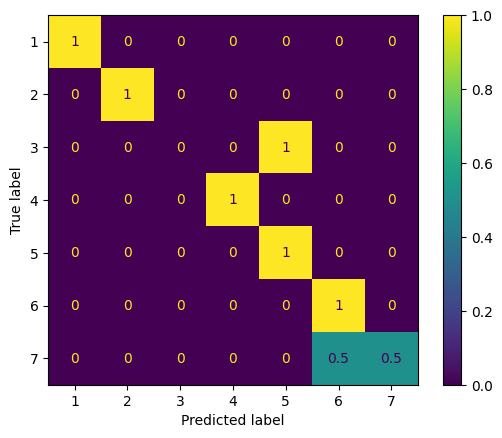

In [ ]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_3, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_3, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_3, X_test, y_test, normalize='true')